<h1> Support Vector Machines (SVM)</h1>

In [8]:
# works through maximum margin seperation
# seperates different classes through line that also maximizes the distance between the closest point of each class
# the closest point to the seperating line is referred to as a "supporting vector" 
# very different classigication strategy versus other algorithims that focus on separation through 
# generalizing class atributes

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [35]:
#import our SVM model
from sklearn.svm import SVC
#many different types of kernels: rbf, sigmoid, polynomial, linear
#arguments make a gaussian kernel
classifier = SVC(kernel = 'rbf', random_state=0)

# Fitting SVM to the Training set
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#get our models predicted values
y_pred = classifier.predict(X_test)

In [37]:
#Make our confusion matrix to see how our knn model's predictions fare
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm.head()

,0,1
0,64,4
1,3,29


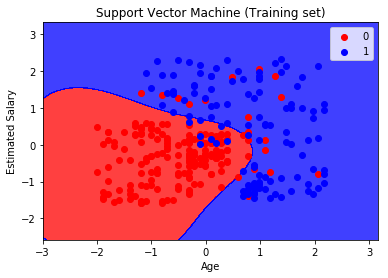

In [38]:
##Visualizing our SVM model's training results
from matplotlib.colors import ListedColormap
#make shortcuts tour features and target variables for easy copy/paste
X_set, y_set = X_train, y_train
#prepare the grid with all the pixel points of the graph, from the min-max range
#take a small step size ~.01, so our colorization looks like shade
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#where the color magic happens, where we apply our color mapping to all the pixels on our graph
#based on our classifier different regions
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
#set the axis limits for our graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plot our data points in color based off their classification
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

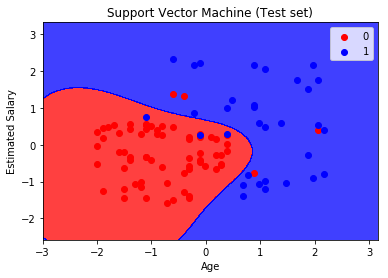

In [39]:
##Visualizing our SVM model's testing results
from matplotlib.colors import ListedColormap
#make shortcuts tour features and target variables for easy copy/paste
X_set, y_set = X_test, y_test
#prepare the grid with all the pixel points of the graph, from the min-max range
#take a small step size ~.01, so our colorization looks like shade
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#where the color magic happens, where we apply our color mapping to all the pixels on our graph
#based on our classifier different regions
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
#set the axis limits for our graph
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#plot our data points in color based off their classification
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [40]:
#not bad, not bad at all